In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data
pm_data_m1 = pd.read_csv(r"C:\Users\396760\lanl_data\PM_clean\ARMSAILM1_cleaned.csv")

# Convert timestamp to datetime
pm_data_m1['Time(UTC)'] = pd.to_datetime(pm_data_m1['Time(UTC)'])

# Create unique datasets for each month in dataset
monthly_data = {}
for month in range(1, 13):
    monthly_data[month] = pm_data_m1[pm_data_m1['Time(UTC)'].dt.month == month]
    """#take ten minute average
    monthly_data[month] = monthly_data[month].resample('10T', on='Time(UTC)').mean()
    #rename collumn back to Time(UTC)
    monthly_data[month].reset_index(inplace=True)
    monthly_data[month] = monthly_data[month].rename(columns={'Time(UTC)': 'Time(UTC)'})
     """

In [9]:
# Define a function to plot time series for a given month with transparency and distinct colors
def plot_monthly_data_all(month, frequency='1T'):
    if frequency == '1T':
        data = monthly_data[month]
    elif frequency == '10T':
        data = monthly_data[month].resample('10T', on='Time(UTC)').mean()
        data.reset_index(inplace=True)
        data = data.rename(columns={'Time(UTC)': 'Time(UTC)'})
    elif frequency == '1H':
        data = monthly_data[month].resample('1H', on='Time(UTC)').mean()
        data.reset_index(inplace=True)
        data = data.rename(columns={'Time(UTC)': 'Time(UTC)'})
    plt.figure(figsize=(12, 6))
    plt.plot(data['Time(UTC)'], data['pm_10_ug_per_m3'], label='PM10', alpha=0.7)
    plt.plot(data['Time(UTC)'], data['pm_25_ug_per_m3'], label='PM2.5', alpha=0.7, color='red')

    plt.plot(data['Time(UTC)'], data['pm_1_ug_per_m3'], label='PM1', alpha=0.7, color = 'purple')
    print()
    plt.xlabel('Time (UTC)')
    plt.ylabel('PM Concentration (ug/m3)')
    plt.title(f'PM Concentration for Month {month}, frequency = {frequency}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_monthly_data(month, pm_x, color, frequency='1T'):
    if frequency == '1T':
        data = monthly_data[month]
    elif frequency == '10T':
        data = monthly_data[month].resample('10T', on='Time(UTC)').mean()
        data.reset_index(inplace=True)
        data = data.rename(columns={'Time(UTC)': 'Time(UTC)'})
    plt.figure(figsize=(12, 6))
    
    plt.plot(data['Time(UTC)'], data[pm_x], label=pm_x, alpha=0.7, color=color)
    print()
    plt.xlabel('Time (UTC)')
    plt.ylabel('PM Concentration (ug/m3)')
    plt.title(f'PM Concentration {pm_x}, for Month {month}, frequency = {frequency}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



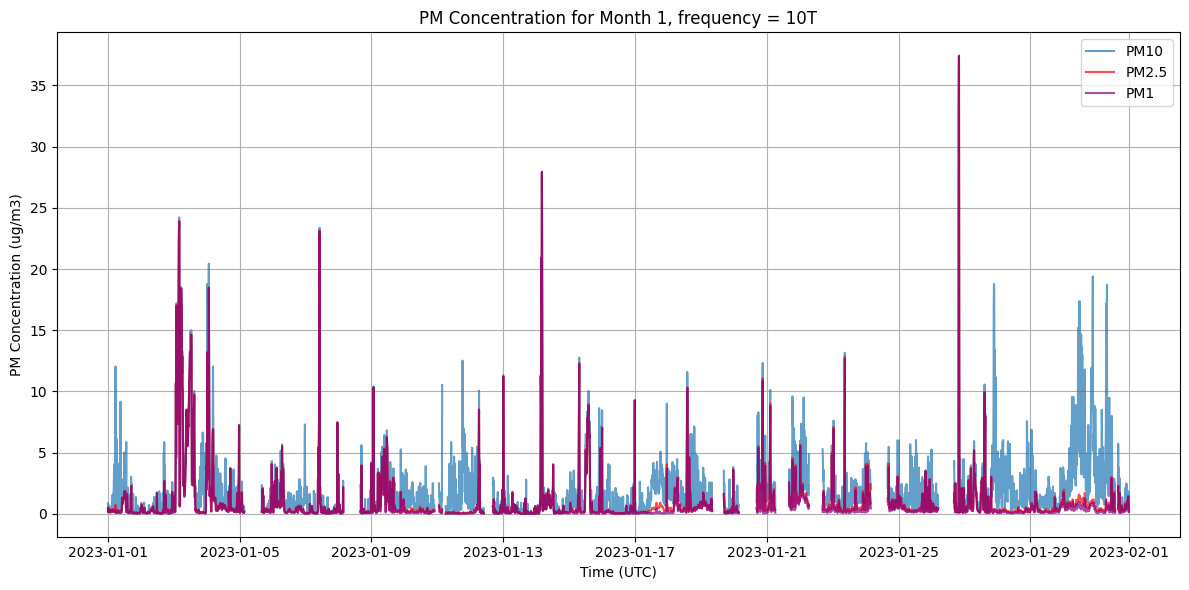

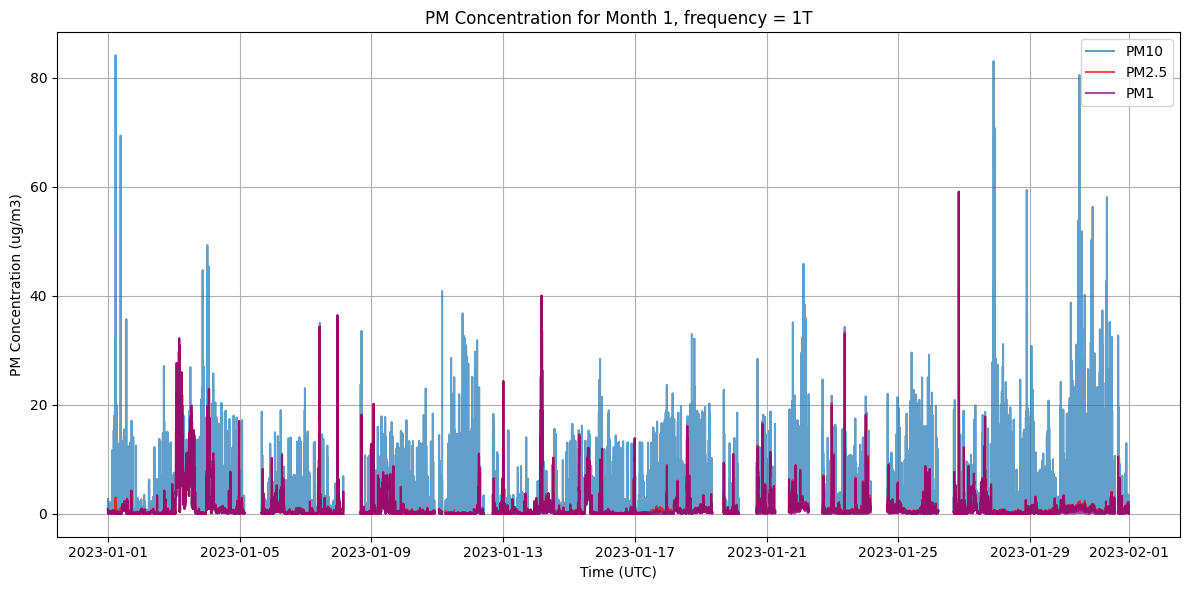

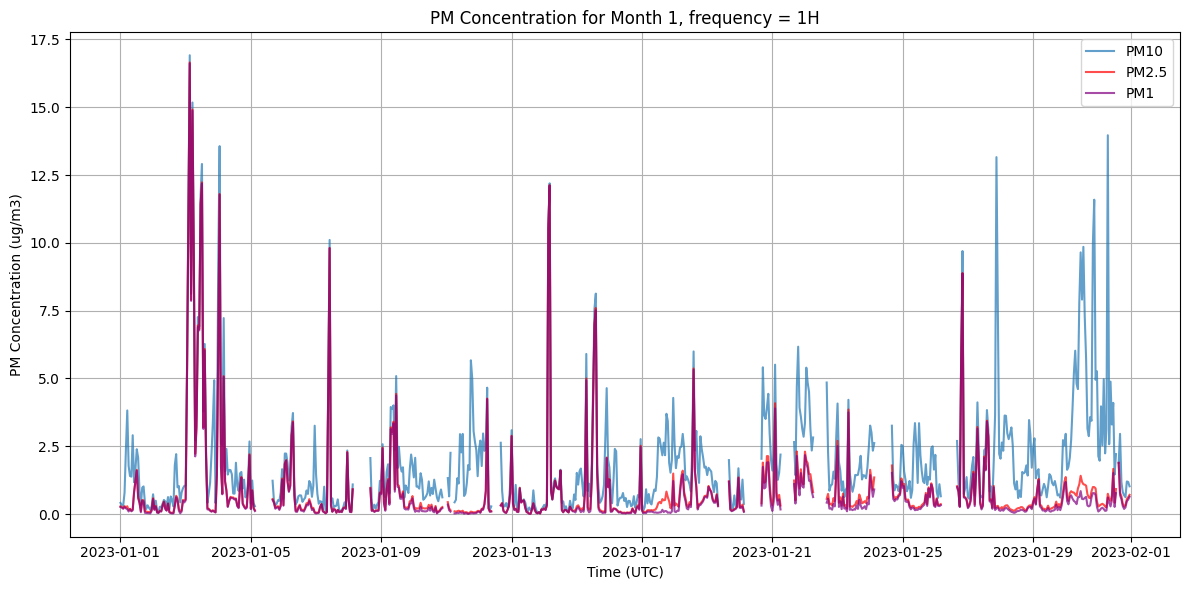

In [10]:
""" #plot them
for month in range(1, 13):
    plot_monthly_data_all(month, '1T')
for month in range(1, 13):
    plot_monthly_data_all(month, '10T')
 
#plot w/out overlays
for month in range(1, 13):
    plot_monthly_data(month, 'pm_1_ug_per_m3', 'red', '10T')
for month in range(1, 13):
    plot_monthly_data(month, 'pm_25_ug_per_m3', 'green', '10T')
for month in range(1, 13):
    plot_monthly_data(month, 'pm_10_ug_per_m3', 'purple' ,'10T')  """

plot_monthly_data_all(1,  '10T')
plot_monthly_data_all(1, '1T')
plot_monthly_data_all(1, '1H')